In [3]:
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import utils.decision_tree as dt
from sklearn.preprocessing import StandardScaler

In [4]:
# Load dataset and prepare test data
assets = pd.read_csv("../dataset/king_country_houses_aa.csv")
df = assets.copy()
correlated_columns = dt.selecting_features(df, corr_coef=0.25)
X_train, X_test, y_train, y_test = dt.select_training_set(df, correlated_columns, test_size=0.4)

Features with correlation coefficient with price > than 0.25
Columns that will be used for the training:
 ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'] 

🔹 Test size 40%:
  Training set size: 12967 | Test set size: 8646


In [7]:
# Path to models folder
models_folder = "../models"

# List of pickle files
model_files = [f for f in os.listdir(models_folder) if f.endswith(".pkl")]


decision_tree_model.pkl


/Users/bubblegum_doubledrops/.jupyter_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


random_forest_model.pkl


/Users/bubblegum_doubledrops/.jupyter_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


lasso_model.pkl
ridge_model.pkl
xgboost_model.pkl


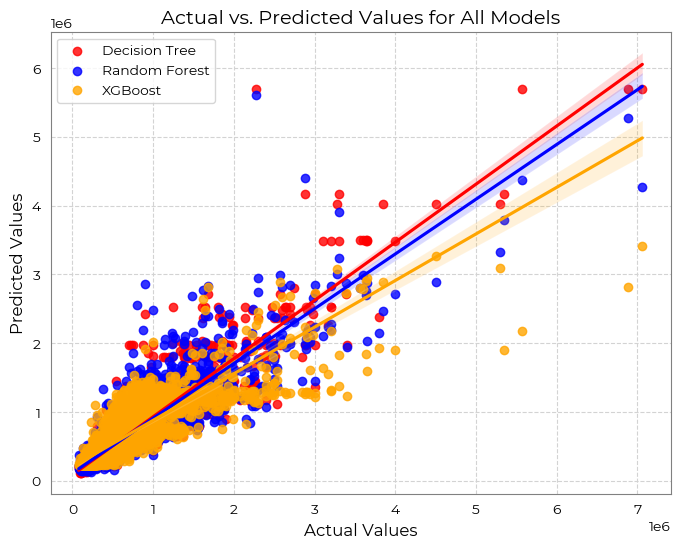

In [9]:

# Define colors (extend dynamically)
base_colors = ["red", "blue", "green", "purple", "orange", "olive"]
colors = base_colors * (len(model_files) // len(base_colors) + 1)

plt.figure(figsize=(8, 6))

# Loop through models
for i, model_file in enumerate(model_files):
    print (model_file)

    if (model_file == "ridge_model.pkl") or (model_file == "lasso_model.pkl"): 
        continue

    with open(os.path.join(models_folder, model_file), "rb") as f:
        model = pickle.load(f)

    # Get model's expected features
    if hasattr(model, "feature_names_in_"):  
        model_features = model.feature_names_in_
    else:
        model_features = X_test.columns  


    # Align X_test with model's expected features

    # Ensure model's expected features are correctly assigned
    expected_features = model.feature_names_in_ if hasattr(model, "feature_names_in_") else X_test.columns[:model.n_features_in_]

    # Reindex X_test_aligned to match model's features and fill missing ones with 0
    X_test_aligned = X_test.reindex(columns=expected_features, fill_value=0)

    # Check for the correct number of columns and make sure the feature names match

    if model_file == "lasso_model.pkl":
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train.reindex(columns=expected_features, fill_value=0))
        X_test_scaled = scaler.transform(X_test_aligned)
        # Predict
        y_pred = model.predict(X_test_scaled) 
    else:
        y_pred = model.predict(X_test_aligned.values)

    # Plot regression
    sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": colors[i]}, line_kws={"color": colors[i]}, label=model_file.replace("_model.pkl", "").replace("_", " ").title().replace("Xgb", "XGB"))

# Customize appearance
plt.xlabel("Actual Values", fontsize=12, color="black")
plt.ylabel("Predicted Values", fontsize=12, color="black")
plt.title("Actual vs. Predicted Values for All Models", fontsize=14)
plt.legend()

# Remove background and grid
plt.gca().set_facecolor("white")
plt.grid(True, color="lightgrey", linestyle="--")
plt.xticks(color="black")
plt.yticks(color="black")


# Save figure
plt.savefig("../images/all_models_regression_plot.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()


/var/folders/mw/fk43c9sj50d252zw3crnw2080000gn/T/ipykernel_6545/1510438499.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.columns, rotation=45)


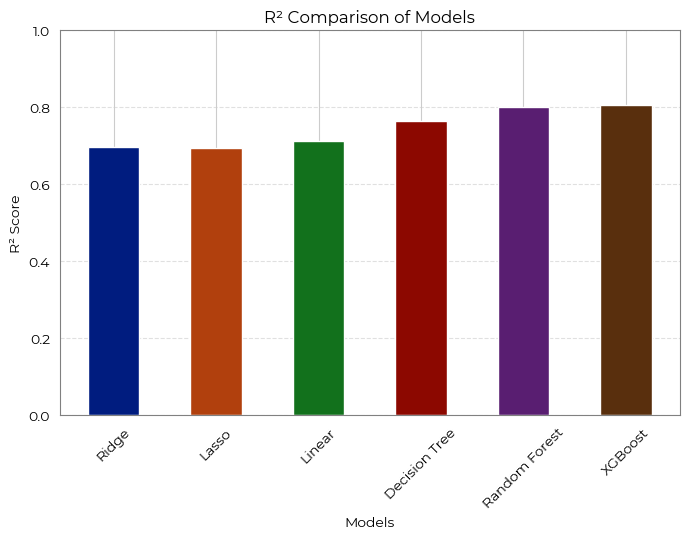

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

base_colors = ["red", "blue", "green", "purple", "orange", "olive"]
colors2 = base_colors * (len(model_files) // len(base_colors) + 1)

def plot_r2_scores(metrics_dict, save_path="r2_comparison.png"):
    # Extract only R² values
    r2_scores = {model: values[0] for model, values in metrics_dict.items()}
    
    # Convert dictionary to DataFrame
    df = pd.DataFrame(r2_scores, index=["R²"])
    
    # Define bar positions
    x = np.arange(len(df.columns))  # Label locations
    width = 0.5  # Width of bars

    # Define colors for each model
    colors = sns.color_palette("dark", len(metrics_dict))
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot each model's R² score
    ax.bar(df.columns, df.loc["R²"], width, color=colors[:len(df.columns)])
    
    # Format plot
    ax.set_xlabel("Models")
    ax.set_ylabel("R² Score")
    ax.set_title("R² Comparison of Models")
    ax.set_ylim(0, 1)  # R² ranges from 0 to 1
    ax.set_xticklabels(df.columns, rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Remove background
    fig.patch.set_alpha(0)
    ax.set_facecolor('white')

    # Save the plot without a background
    plt.savefig("../images/all_models_r2.png", dpi=300, bbox_inches='tight', transparent=True)
    plt.show()

# Example usage
model_metrics = {
    "Ridge": [0.6957],
    "Lasso": [0.6955],
    "Linear": [0.7128],
    "Decision Tree": [0.7643], 
    "Random Forest": [0.8004],
    "XGBoost": [0.8056]
}

plot_r2_scores(model_metrics)